# **Topic 3.2: Advanced Probabilistic Models**

### Exercise 1: Setting Up the Environment

---


In [ ]:
pip install pgmpy numpy pandas matplotlib

In [ ]:
import numpy
import pandas
import matplotlib.pyplot as plt
import networkx as nx

### Exercise 2: Building a Simple DBN

---



In [ ]:
from pgmpy.models import DynamicBayesianNetwork as DynamicBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import DBNInference

model.add_edges_from([(('Rain', 0), ('Sprinkler', 0)), (('Rain', 0), ('Rain', 1))])

model.add_cpds(
    TabularCPD(('Rain', 0), 2, [[0.8], [0.2]]),
    TabularCPD(('Sprinkler', 0), 2,[[0.6, 0.2], [0.4, 0.8]], evidence=[('Rain', 0)], evidence_card=[2]),
    TabularCPD(('Rain', 1), 2, [[0.7, 0.3], [0.3, 0.7]], evidence=[('Rain', 0)], evidence_card=[2]),
    TabularCPD(variable=('Rain', 1), variable_card=2, values=[[0.7, 0.3], [0.3, 0.7]], evidence=[('Rain', 0)], evidence_card=[2]),
    TabularCPD(variable=('Sprinkler', 1), variable_card=2, values=[[0.6, 0.2], [0.4, 0.8]], evidence=[('Rain', 1)], evidence_card=[2])
)

### Exercise 3: Performing Inference

---


In [ ]:
dbn_infer = DBNInference(model)
result = dbn_infer.query(variables=[('Rain', 1)], evidence={('Rain', 0): 1})
print(result)

{('Rain', 1): <DiscreteFactor representing phi(('Rain', 1):2) at 0x7a4896d78d30>}


### Exercise 4: Visualizing the DBN

---


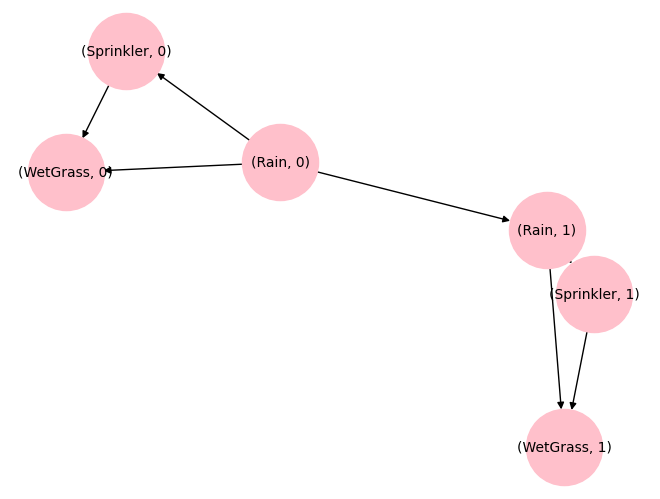

In [ ]:
edges = model.edges
graph = nx.DiGraph()
graph.add_edges_from(edges)

nx.draw(graph, with_labels=True, node_size=3000, node_color='pink', font_size=10)
plt.show()

### Exercise 5: Extending the DBN

---


{('WetGrass', 1): <DiscreteFactor representing phi(('WetGrass', 1):2) at 0x7a489cd84700>}


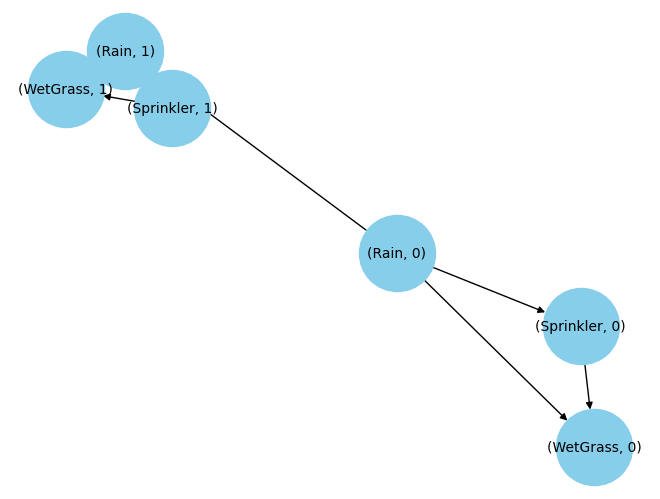

In [ ]:
model.add_edges_from([
    (('Rain', 0), ('WetGrass', 0)),
    (('Sprinkler', 0), ('WetGrass', 0)),
    (('Rain', 1), ('WetGrass', 1)),
    (('Sprinkler', 1), ('WetGrass', 1))
])

model.add_cpds(
    TabularCPD(('WetGrass', 0), 2, [[1, 0.1, 0.1, 0.01], [0, 0.9, 0.9, 0.99]], evidence=[('Sprinkler', 0), ('Rain', 0)], evidence_card=[2, 2]),
    TabularCPD(('WetGrass', 1), 2, [[1, 0.1, 0.1, 0.01], [0, 0.9, 0.9, 0.99]], evidence=[('Sprinkler', 1), ('Rain', 1)], evidence_card=[2, 2])
)

dbn_infer_extended = DBNInference(model)
result_extended = dbn_infer_extended.query(variables=[('WetGrass', 1)], evidence={('Rain', 0): 1})
print(result_extended)

edges_extended = model.edges
graph_extended = nx.DiGraph()
graph_extended.add_edges_from(edges_extended)

nx.draw(graph_extended, with_labels=True, node_size=3000, node_color='skyblue', font_size=10)
plt.show()